## Nodes Reduction Analysis
 
In this notebook, we analyze the reduction in the number of nodes before and after applying
the normalization and pruning techniques. We load the data
from two text files: `prev_nodes_number.txt` and `post_nodes_number.txt`, which contain the
number of nodes before and after the processing, respectively.

prev_data len: 600
post_data len: 600


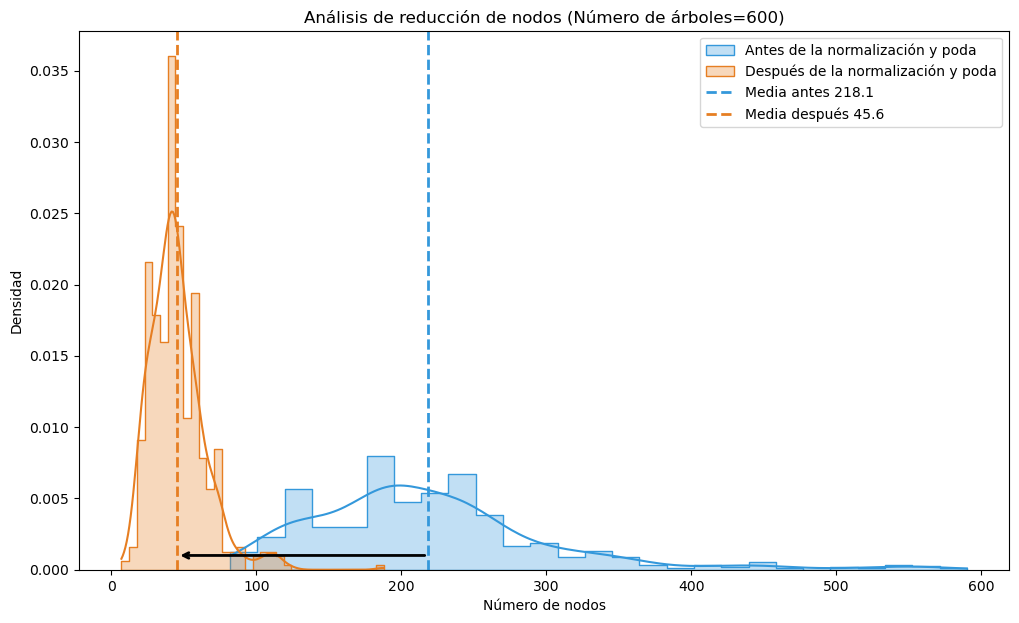

Average Reduction: 79.09%
Absolute Node Loss: 172.47 nodes on average.


In [1]:
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def load_data(filename):
    with open(filename, "r") as f:
        return np.array(ast.literal_eval(f.read().strip()))

# load data generated from nodes_number.py
prev_data = load_data("prev_nodes_number.txt")
post_data = load_data("post_nodes_number.txt")

print("prev_data len:", len(prev_data))
print("post_data len:", len(post_data))

# Mean
mean_prev = np.mean(prev_data)
mean_post = np.mean(post_data)

plt.figure(figsize=(12, 7))
sns.histplot(
    prev_data,
    color="#3498db",
    label="Antes de la normalización y poda",
    element="step",
    kde=True,
    stat="density",
    alpha=0.3,
)
sns.histplot(
    post_data,
    color="#e67e22",
    label="Después de la normalización y poda",
    element="step",
    kde=True,
    stat="density",
    alpha=0.3,
)

plt.axvline(
    mean_prev,
    color="#3498db",
    linestyle="--",
    linewidth=2,
    label=f"Media antes {mean_prev:.1f}",
)
plt.axvline(
    mean_post,
    color="#e67e22",
    linestyle="--",
    linewidth=2,
    label=f"Media después {mean_post:.1f}",
)

plt.annotate(
    "",
    xy=(mean_post, 0.001),
    xytext=(mean_prev, 0.001),
    arrowprops=dict(arrowstyle="->", color="black", lw=2),
)


plt.title(f"Análisis de reducción de nodos (Número de árboles={len(post_data)})")
plt.xlabel("Número de nodos")
plt.ylabel("Densidad")
plt.legend()
plt.show()

reduction_pct = ((mean_prev - mean_post) / mean_prev) * 100

print(f"Average Reduction: {reduction_pct:.2f}%")
print(f"Absolute Node Loss: {mean_prev - mean_post:.2f} nodes on average.")